# Pronostia dataset

Both learning and test datasets were given in "7z" compressed folders. Each one contains vibration ASCII files named "acc_xxxxx.csv", and temperature ASCII files named "temp_xxxxx.csv".
The data acquisition parameters are given bellow and must be considered carefully.
-- Vibration signals (horizontal and vertical)
- Sampling frequency: 25.6 kHz
- Recordings: 2560 samples (i.e. 1/10 s) are recorded each 10 seconds (see Fig. 6)
-- Temperature signals
- Sampling frequency: 10 Hz
- Recordings: 600 samples are recorded each minute

# Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path1="//content//drive//MyDrive//Projects//BTP-II//ieee-phm-2012-data-challenge-dataset-master//Learning_set"
dir_path2="//content//drive//MyDrive//Projects//BTP-II//ieee-phm-2012-data-challenge-dataset-master//Test_set"


In [ ]:
!pip install pandas --quiet
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install scipy --quiet
!pip install scipy --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import warnings
import math
from tqdm import tqdm
import scipy
import concurrent.futures
warnings.filterwarnings('ignore')

# Importing the dataset

In [ ]:
import os
#directory_path="\\Projects\\EHS_BTP-II\\archive\\2nd_test\\2nd_test\\"
#dir_path1="D:\\Projects\\EHS_BTP-II\\Bearing_Dataset\\Learning_set"
#dir_path1=directory_path
#dir_path2="D:\\Projects\\EHS_BTP-II\\Bearing_Dataset\\Test_set"

# Working condition 1

In [ ]:
# Process the files to extract the acceleration-vibrational data
def process_file(dir_path,bearing_no):
    bearing_info=[]
    for file in tqdm(os.listdir(os.path.join(dir_path, bearing_no)), desc='Processing...'):
        if(file.startswith('acc')):
            temp_df=pd.read_csv(os.path.join(dir_path, bearing_no,file), header=None)
            bearing_info.append(temp_df.iloc[:,4].values)
    return bearing_info

In [ ]:
!pip install tqdm --quiet

# Training set

In [ ]:
# Extract the vib signals data
b11_=process_file(dir_path1,'Bearing1_1')

b12_=process_file(dir_path1,'Bearing1_2')

Processing...:   1%|          | 34/3279 [01:24<2:13:45,  2.47s/it]


KeyboardInterrupt: ignored

In [ ]:
len(b11_), len(b12_)

(267, 0)

In [ ]:
# Extyracting the actual data from all the files related a bearing
b11=[val for arr in b11_ for val in arr]
b12=[val for arr in b12_ for val in arr]

In [ ]:
len(b11), len(b12)

(7175680, 2229760)

# Training set - analysis

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time(Bearing-1)')

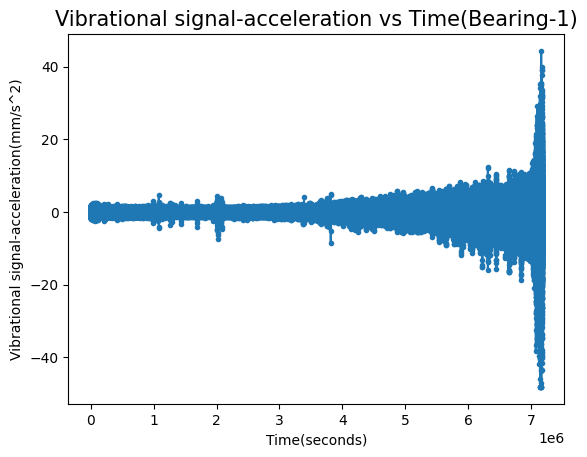

In [ ]:
plt.scatter(np.arange(0, len(b11)), b11, marker=".") # x - axis --> values from 0 to the length of b11
plt.plot(np.arange(0, len(b11)), b11)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-1)", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time(Bearing-2)')

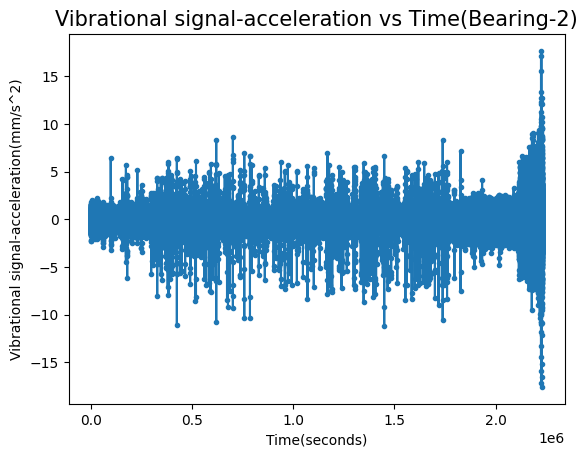

In [ ]:
plt.scatter(np.arange(0, len(b12)), b12, marker=".")
plt.plot(np.arange(0, len(b12)), b12)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-2)", fontsize=15)

# Test set

In [ ]:
b13_=process_file(dir_path2,'Bearing1_3')
b14_=process_file(dir_path2,'Bearing1_4')
#b15_=process_file(dir_path2,'Bearing1_5')
#b16_=process_file(dir_path2,'Bearing1_6')
#b17_=process_file(dir_path2,'Bearing1_7')

Processing...: 100%|██████████| 1327/1327 [00:07<00:00, 180.72it/s]


In [ ]:
b13=[val for arr in b13_ for val in arr]
b14=[val for arr in b14_ for val in arr]
#b15=[val for arr in b15_ for val in arr]
#b16=[val for arr in b16_ for val in arr]
#b17=[val for arr in b17_ for val in arr]

# Test set - analysis


Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time(Bearing-3)')

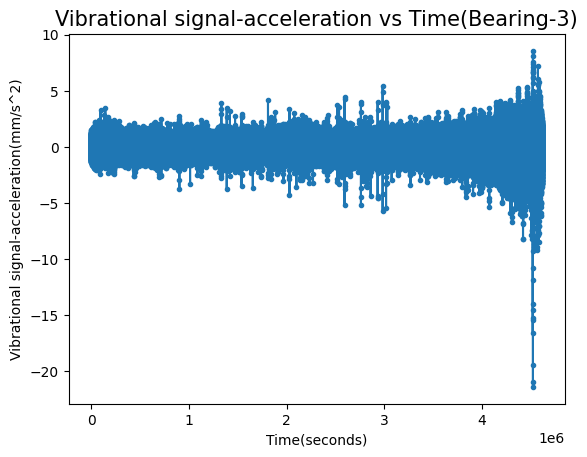

In [ ]:
plt.scatter(np.arange(0, len(b13)), b13, marker=".")
plt.plot(np.arange(0, len(b13)), b13)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-3)", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time(Bearing-4)')

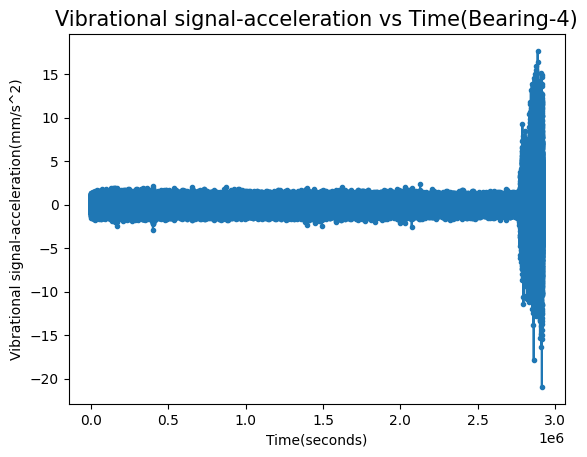

In [ ]:
plt.scatter(np.arange(0, len(b14)), b14, marker=".")
plt.plot(np.arange(0, len(b14)), b14)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-4)", fontsize=15)

In [ ]:
'''
plt.scatter(np.arange(0, len(b15)), b15, marker=".")
plt.plot(np.arange(0, len(b15)), b15)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-5)", fontsize=15)
'''

'\nplt.scatter(np.arange(0, len(b15)), b15, marker=".")\nplt.plot(np.arange(0, len(b15)), b15)\nplt.xlabel("Time(seconds)", fontsize=10)\nplt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)\nplt.title("Vibrational signal-acceleration vs Time(Bearing-5)", fontsize=15)\n'

In [ ]:
'''
plt.scatter(np.arange(0, len(b16)), b16, marker=".")
plt.plot(np.arange(0, len(b16)), b16)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-6)", fontsize=15)
'''

'\nplt.scatter(np.arange(0, len(b16)), b16, marker=".")\nplt.plot(np.arange(0, len(b16)), b16)\nplt.xlabel("Time(seconds)", fontsize=10)\nplt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)\nplt.title("Vibrational signal-acceleration vs Time(Bearing-6)", fontsize=15)\n'

In [ ]:
'''
plt.scatter(np.arange(0, len(b17)), b17, marker=".")
plt.plot(np.arange(0, len(b17)), b17)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time(Bearing-7)", fontsize=15)
'''

'\nplt.scatter(np.arange(0, len(b17)), b17, marker=".")\nplt.plot(np.arange(0, len(b17)), b17)\nplt.xlabel("Time(seconds)", fontsize=10)\nplt.ylabel("Vibrational signal-acceleration(mm/s^2)", fontsize=10)\nplt.title("Vibrational signal-acceleration vs Time(Bearing-7)", fontsize=15)\n'

# Feature extraction

RMS Values extraction

In [ ]:
# Extracting Root mean square values(Time domain features) of every sample of each bearing
def rms_extraction(dir_path, bearing_no):
    b_rms=[]
    for file in tqdm(os.listdir(os.path.join(dir_path, bearing_no)), desc='Processing...'):
        if(file.startswith('acc')):
            temp_df=pd.read_csv(os.path.join(dir_path, bearing_no,file), header=None)
            vib_signals=temp_df.iloc[:,4].values
            rms=sum(x**2 for x in vib_signals)/len(vib_signals)
            b_rms.append(rms)
    return b_rms


In [ ]:
b11_rms=rms_extraction(dir_path1,'Bearing1_1')
b12_rms=rms_extraction(dir_path1,'Bearing1_2')
b13_rms=rms_extraction(dir_path2,'Bearing1_3')
b14_rms=rms_extraction(dir_path2,'Bearing1_4')
#b15_rms=rms_extraction(dir_path2,'Bearing1_5')
#b16_rms=rms_extraction(dir_path2,'Bearing1_6')
#b17_rms=rms_extraction(dir_path2,'Bearing1_7')

Processing...: 100%|██████████| 1327/1327 [00:03<00:00, 349.04it/s]


# Bearing 1

# Mean, max, min, kurtosis, skewness

In [ ]:

mean=np.mean(b11_rms)
minimum=np.min(b11_rms)
maximum=np.max(b11_rms)
skewness=scipy.stats.skew(b11_rms,bias=True)
kurtosis=scipy.stats.kurtosis(b11_rms, bias=True)
mean, minimum, maximum, skewness,kurtosis

(0.7765968811543993,
 0.08583456132812514,
 44.99135419609373,
 9.736065724598905,
 118.4094244887533)

skewness is a measure of distribution tells the weight on left or right side of the distribution
skweness = 0 --> normal distribution
skewness>0 --> More weight on left side of the distribution (Mode lies in left side)
skewness<0 --> More weight on right side of the distribution (Mode lies in right side)

heavy tail or lighted tail --> heavy tailed - positive kurtosis
                           --> light tailed - negative kurtosis

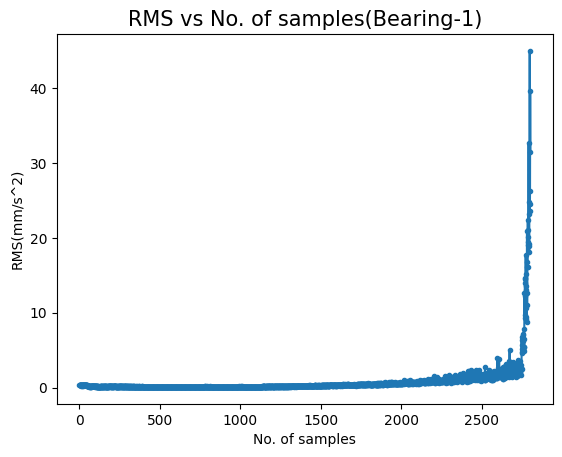

In [ ]:
plt.scatter(np.arange(0, len(b11_rms)), b11_rms, marker=".")
plt.plot(np.arange(0, len(b11_rms)), b11_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-1)", fontsize=15)
plt.show()

# Bearing-2

In [ ]:
mean=np.mean(b12_rms)
minimum=np.min(b12_rms)
maximum=np.max(b12_rms)
skewness=scipy.stats.skew(b12_rms,bias=True)
kurtosis=scipy.stats.kurtosis(b12_rms,bias=True)
mean, minimum, maximum, skewness,kurtosis

(0.20841878746232775,
 0.07355472929687508,
 4.992449302343742,
 5.88618498913968,
 42.71691081257614)

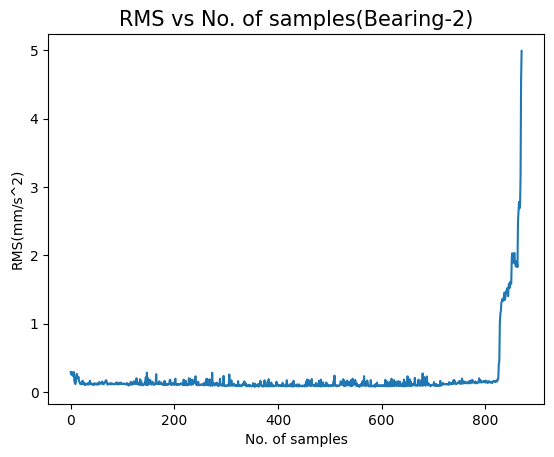

In [ ]:
#plt.scatter(np.arange(0, len(b2_rms)), b2_rms, marker=".")
plt.plot(np.arange(0, len(b12_rms)), b12_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-2)", fontsize=15)
plt.show()

# Bearing 3

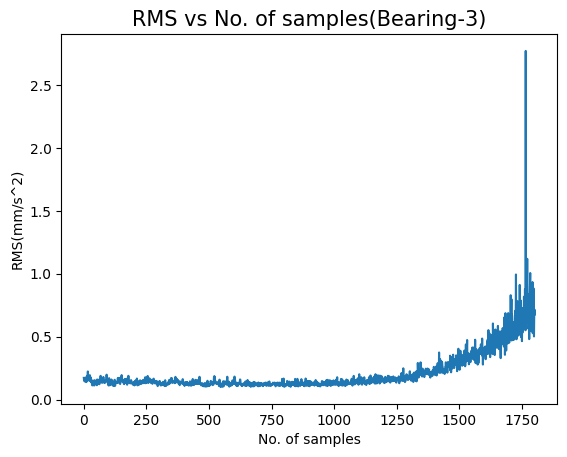

In [ ]:

plt.plot(np.arange(0, len(b13_rms)), b13_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-3)", fontsize=15)
plt.show()

# Bearing 4

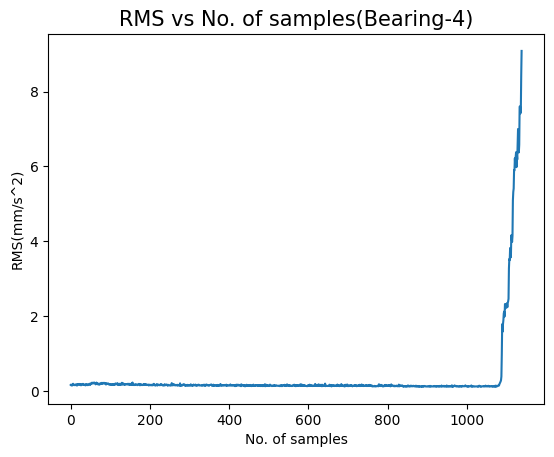

In [ ]:

plt.plot(np.arange(0, len(b14_rms)), b14_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-4)", fontsize=15)
plt.show()

# Bearing 5

In [ ]:
'''
plt.plot(np.arange(0, len(b15_rms)), b15_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-5)", fontsize=15)
plt.show()
'''

'\nplt.plot(np.arange(0, len(b15_rms)), b15_rms)\nplt.xlabel("No. of samples", fontsize=10)\nplt.ylabel("RMS(mm/s^2)", fontsize=10)\nplt.title("RMS vs No. of samples(Bearing-5)", fontsize=15)\nplt.show()\n'

# Bearing 6

In [ ]:
'''
plt.plot(np.arange(0, len(b16_rms)), b16_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-6)", fontsize=15)
plt.show()
'''

'\nplt.plot(np.arange(0, len(b16_rms)), b16_rms)\nplt.xlabel("No. of samples", fontsize=10)\nplt.ylabel("RMS(mm/s^2)", fontsize=10)\nplt.title("RMS vs No. of samples(Bearing-6)", fontsize=15)\nplt.show()\n'

# Bearing 7

In [ ]:
'''
plt.plot(np.arange(0, len(b17_rms)), b17_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(Bearing-7)", fontsize=15)
plt.show()
'''

'\nplt.plot(np.arange(0, len(b17_rms)), b17_rms)\nplt.xlabel("No. of samples", fontsize=10)\nplt.ylabel("RMS(mm/s^2)", fontsize=10)\nplt.title("RMS vs No. of samples(Bearing-7)", fontsize=15)\nplt.show()\n'

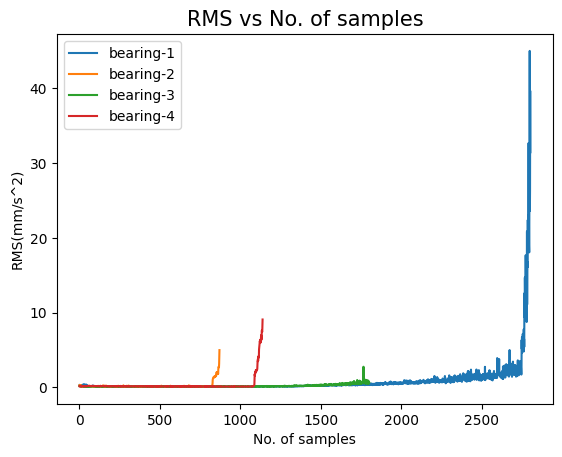

In [ ]:
#plt.scatter(np.arange(0, len(b1_rms)), b1_rms, marker=".")
plt.plot(np.arange(0, len(b11_rms)), b11_rms, label="bearing-1")

#plt.scatter(np.arange(0, len(b2_rms)), b2_rms, marker=".")
plt.plot(np.arange(0, len(b12_rms)), b12_rms,label="bearing-2")

#plt.scatter(np.arange(0, len(b3_rms)), b3_rms, marker=".")
plt.plot(np.arange(0, len(b13_rms)), b13_rms,label="bearing-3")

#plt.scatter(np.arange(0, len(b4_rms)), b4_rms, marker=".")
plt.plot(np.arange(0, len(b14_rms)), b14_rms,label="bearing-4")
#plt.plot(np.arange(0, len(b15_rms)), b15_rms,label="bearing-5")
#plt.plot(np.arange(0, len(b16_rms)), b16_rms,label="bearing-6")
#plt.plot(np.arange(0, len(b17_rms)), b17_rms,label="bearing-7")
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(mm/s^2)", fontsize=10)
plt.title("RMS vs No. of samples", fontsize=15)

plt.legend()
plt.show()

In [ ]:
# Tranforming the list to array to perform reshape operation
b11_rms=np.array(b11_rms)
b12_rms=np.array(b12_rms)
b13_rms=np.array(b13_rms)
b14_rms=np.array(b14_rms)

# Standardization

In [ ]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
b11_rms=sc.fit_transform(b11_rms.reshape(-1,1))
b12_rms=sc.transform(b12_rms.reshape(-1,1))
b13_rms=sc.transform(b13_rms.reshape(-1,1))
b14_rms=sc.transform(b14_rms.reshape(-1,1))

#Hidden Markov Model

Install hmmlearn- unsupervised learning algorithm for clustring of dataset

In [ ]:
%pip install hmmlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\katra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
%pip install --user git+https://github.com/hmmlearn/hmmlearn

Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/hmmlearn/hmmlearn 'C:\Users\katra\AppData\Local\Temp\pip-req-build-a4qfxkpj'

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\katra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Cloning https://github.com/hmmlearn/hmmlearn to c:\users\katra\appdata\local\temp\pip-req-build-a4qfxkpj
  Resolved https://github.com/hmmlearn/hmmlearn to commit 822894e24e8632cfa3f10304240d3f5049516580
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


# Using K means Clustering model

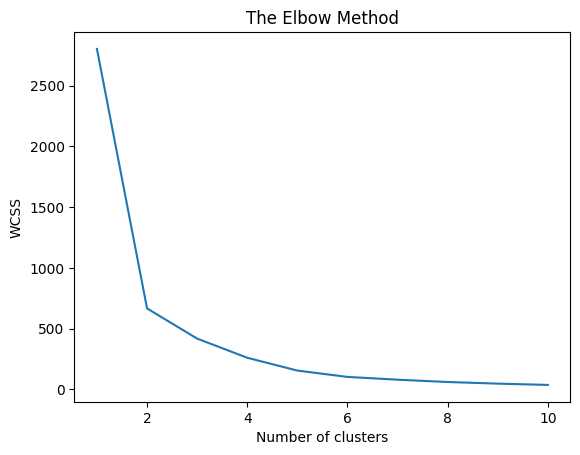

In [ ]:
# Elbow method to find the optimal value of k - number of clusters
from sklearn.cluster import KMeans
b11_rms=np.array(b11_rms)
x1=b11_rms.reshape(-1,1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_) # wcss - within cluster sum of squares

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()

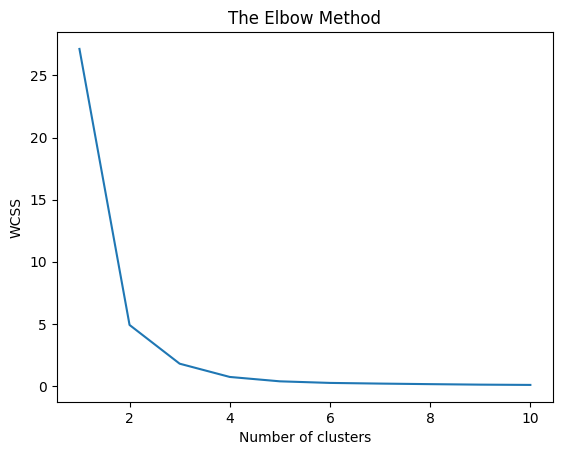

In [ ]:
from sklearn.cluster import KMeans
b12_rms=np.array(b12_rms)
x2=b12_rms.reshape(-1,1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()

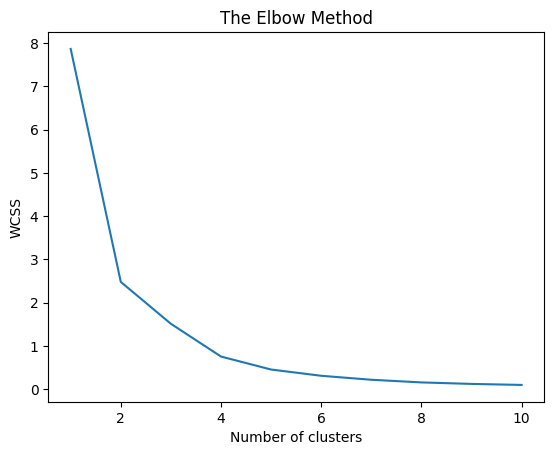

In [ ]:
from sklearn.cluster import KMeans
b13_rms=np.array(b13_rms)
x3=b13_rms.reshape(-1,1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()

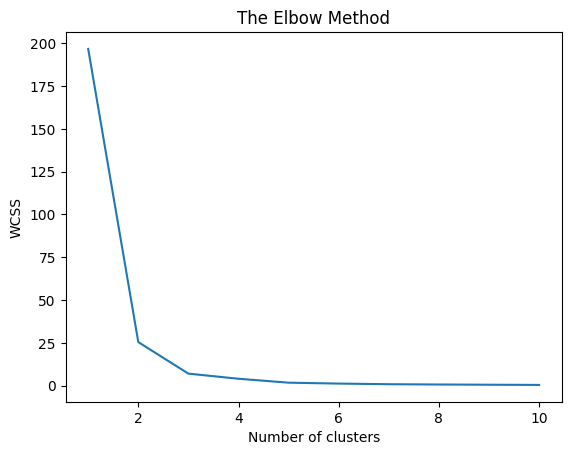

In [ ]:
from sklearn.cluster import KMeans
b14_rms=np.array(b14_rms)
x4=b14_rms.reshape(-1,1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()

In [ ]:
# Using the above graphs, the optimal number of clusters turned out to be 3[From 3rd cluster it is linear ]
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
# Training K-Means
kmeans.fit(b11_rms.reshape(-1,1))
kmeans.fit(b12_rms.reshape(-1,1))

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Prediction of 1st bearing
y_kmeans=kmeans.predict(b11_rms.reshape(-1,1))

In [ ]:
# Code for determining the failure occurence time by considering the harmonic frequency of 3
count=0
freq=0
for i in range(len(y_kmeans)):
    if(y_kmeans[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_kmeans[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


2660


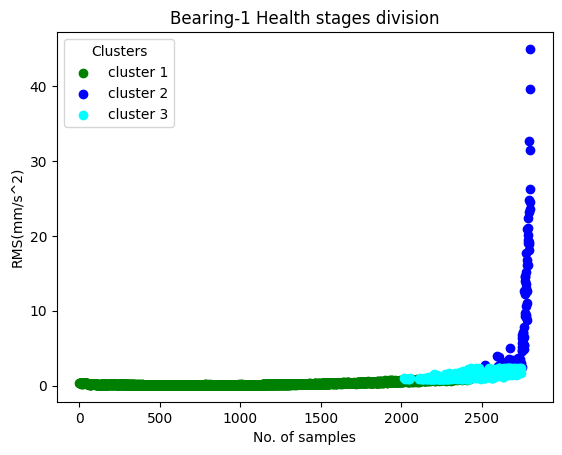

In [ ]:
from matplotlib.colors import ListedColormap
x1=sc.inverse_transform(x1)
for i,j in enumerate(np.unique(y_kmeans)):
  plt.scatter([list(x1).index(val) for val in x1[y_kmeans==j,0]], x1[y_kmeans==j,0], c=ListedColormap(('green','blue','cyan','red'))(i),label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-1 Health stages division")
plt.show()

In [ ]:
y_kmeans=kmeans.predict(b12_rms.reshape(-1,1))
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
count=0
freq=0
for i in range(len(y_kmeans)):
    if(y_kmeans[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_kmeans[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


863

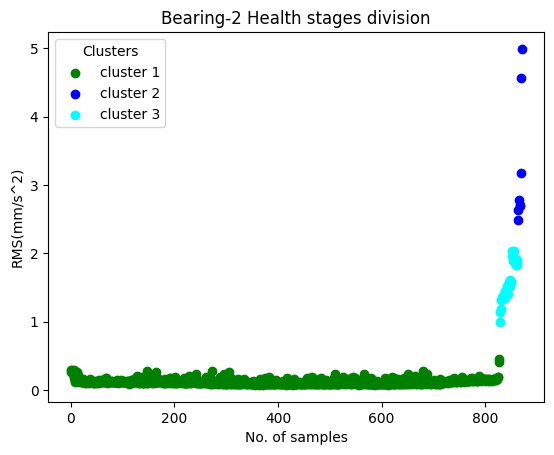

In [ ]:
from matplotlib.colors import ListedColormap
x2=sc.inverse_transform(x2)
for i,j in enumerate(np.unique(y_kmeans)):
  plt.scatter([list(x2).index(val) for val in x2[y_kmeans==j,0]], x2[y_kmeans==j,0], c=ListedColormap(('green','blue','cyan','red'))(i),label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-2 Health stages division")
plt.show()

In [ ]:
y_kmeans=kmeans.predict(b13_rms.reshape(-1,1))

In [ ]:
count=0
freq=0
for i in range(len(y_kmeans)):
    if(y_kmeans[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_kmeans[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


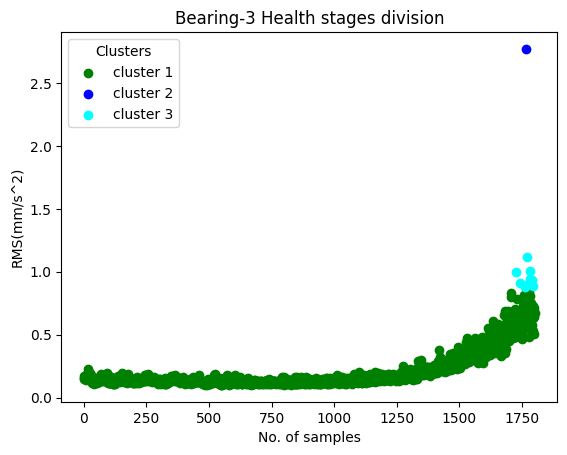

In [ ]:
from matplotlib.colors import ListedColormap
x3=sc.inverse_transform(x3)
for i,j in enumerate(np.unique(y_kmeans)):
  plt.scatter([list(x3).index(val) for val in x3[y_kmeans==j,0]], x3[y_kmeans==j,0], c=ListedColormap(('green','blue','cyan','red'))(i), label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-3 Health stages division")
plt.show()

In [ ]:
y_kmeans=kmeans.predict(b14_rms.reshape(-1,1))
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
count=0
freq=0
for i in range(len(y_kmeans)):
    if(y_kmeans[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_kmeans[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


1105


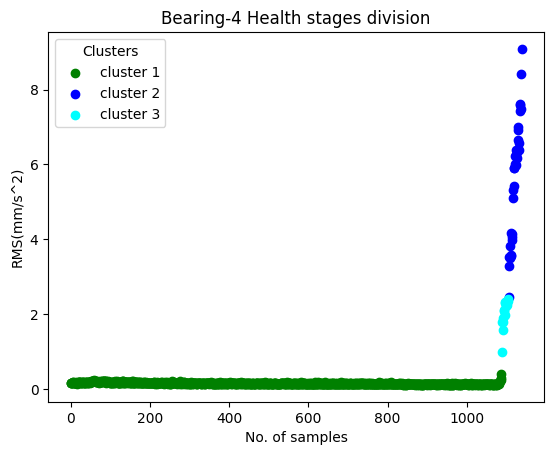

In [ ]:
from matplotlib.colors import ListedColormap
x4=sc.inverse_transform(x4)
for i,j in enumerate(np.unique(y_kmeans)):
  plt.scatter([list(x4).index(val) for val in x4[y_kmeans==j,0]], x4[y_kmeans==j,0], c=ListedColormap(('green','blue','cyan','red'))(i),label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-4 Health stages division")
plt.show()

# DBSCAN Clustering

In [ ]:
'''
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Finding the number of minimum samples using k-distance graph
# using Nearest Neighbours algorithm
k=5
# k distance plot
nn=NearestNeighbors(n_neighbors=k)
nn.fit(b1_rms.reshape(-1,1))

# distances --> distance of each point to its nearest neighbors
distances, indices=nn.kneighbors(b1_rms.reshape(-1,1))
k_distances=distances[:,-1]

# Plot the k-distance graph
k_distances_sorted = np.sort(k_distances)
plt.plot(k_distances_sorted)
plt.xlabel("Points sorted by distance to their k-th nearest neighbor")
plt.ylabel("k-th nearest neighbor distance")
plt.show()
'''


'\nfrom sklearn.cluster import DBSCAN\nfrom sklearn.neighbors import NearestNeighbors\n# Finding the number of minimum samples using k-distance graph\n# using Nearest Neighbours algorithm\nk=5\n# k distance plot\nnn=NearestNeighbors(n_neighbors=k)\nnn.fit(b1_rms.reshape(-1,1))\n\n# distances --> distance of each point to its nearest neighbors\ndistances, indices=nn.kneighbors(b1_rms.reshape(-1,1))\nk_distances=distances[:,-1]\n\n# Plot the k-distance graph\nk_distances_sorted = np.sort(k_distances)\nplt.plot(k_distances_sorted)\nplt.xlabel("Points sorted by distance to their k-th nearest neighbor")\nplt.ylabel("k-th nearest neighbor distance")\nplt.show()\n'

In [ ]:
'''
eps=0.30
dbscan_model=DBSCAN(eps=eps, min_samples=200)
dbscan_model.fit(b1_rms.reshape(-1,1))
labels=dbscan_model.labels_
labels
'''

'\neps=0.30\ndbscan_model=DBSCAN(eps=eps, min_samples=200)\ndbscan_model.fit(b1_rms.reshape(-1,1))\nlabels=dbscan_model.labels_\nlabels\n'

In [ ]:
'''
global labels
while True:
    labels=dbscan_model.labels_
    if np.sum(labels==-1)==0:
        break
    eps*=1.1
    dbscan_model=DBSCAN(eps=eps, min_samples=5)
    dbscan_model.fit(b1_rms.reshape(-1,1))

print(labels)
# Plot the resulting clusters
X=b1_rms.reshape(-1,1)
plt.scatter(range(len(X)), X[:, 0], c=labels, cmap="rainbow")
plt.show()
'''

'\nglobal labels\nwhile True:\n    labels=dbscan_model.labels_\n    if np.sum(labels==-1)==0:\n        break\n    eps*=1.1\n    dbscan_model=DBSCAN(eps=eps, min_samples=5)\n    dbscan_model.fit(b1_rms.reshape(-1,1))\n\nprint(labels)\n# Plot the resulting clusters\nX=b1_rms.reshape(-1,1)\nplt.scatter(range(len(X)), X[:, 0], c=labels, cmap="rainbow")\nplt.show()\n'

In [ ]:
'''
from sklearn import metrics

#evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f"%sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f"%ari)
'''

'\nfrom sklearn import metrics\n\n#evaluation metrics\nsc = metrics.silhouette_score(X, labels)\nprint("Silhouette Coefficient:%0.2f"%sc)\nari = adjusted_rand_score(y_true, labels)\nprint("Adjusted Rand Index: %0.2f"%ari)\n'

# Spectral Clustering

In [ ]:
'''
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

def similarity_matrix(X):
    # compute the similarity or affinity matrix
    D=pairwise_distances(X, metric='euclidean')
    # calculating the median of distances -- similarity matrix
    sigma = np.median(D)
    # transforming the data to a spectral matrix
    W = np.exp(-D**2 / (2 * sigma**2))
    return W

# Apply spectral clustering
n_clusters = 3
sc_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100, assign_labels='kmeans', n_jobs=-1, random_state=42)

W=similarity_matrix(X)
sc_model.fit(W)
sc_model.labels_
'''

"\nfrom sklearn.cluster import SpectralClustering\nfrom sklearn.metrics import pairwise_distances\n\ndef similarity_matrix(X):\n    # compute the similarity or affinity matrix\n    D=pairwise_distances(X, metric='euclidean')\n    # calculating the median of distances -- similarity matrix\n    sigma = np.median(D)\n    # transforming the data to a spectral matrix\n    W = np.exp(-D**2 / (2 * sigma**2))\n    return W\n\n# Apply spectral clustering\nn_clusters = 3\nsc_model = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100, assign_labels='kmeans', n_jobs=-1, random_state=42)\n\nW=similarity_matrix(X)\nsc_model.fit(W)\nsc_model.labels_\n"

In [ ]:
#sc_model.n_features_in_, sc_model.affinity_matrix_

In [ ]:
#b2_trans=similarity_matrix(b2_rms.reshape(-1,1))
#sc_model.fit_predict(b2_trans)

# GMMHMM -> Guassian mixture emissions

In [ ]:
# Importing the required library to work with HMM
from hmmlearn import hmm

In [ ]:
# Finding the optimal value of random state "i"
# Running a for loop until random state of 42
# n_components -> number of hidden states
# n_mix is a hyperameter which refers to the number of gaussian mixtures
fot_vals=[]
for i in range(43):
    hmm_model=hmm.GMMHMM(n_components=3,n_mix=4,n_iter=50, random_state=i, tol=0.0001)
    hmm_model.fit(b11_rms.reshape(-1,1))
    hmm_model.fit(b12_rms.reshape(-1,1))
    try:
        y_hmm=hmm_model.predict(b11_rms.reshape(-1,1))
        count=0
        freq=0
        for j in range(len(y_hmm)):
            if(y_hmm[j]!=1):
                count+=1
                freq=0
            if(j>0 and y_hmm[j]==1):
                freq+=1
                if(freq>=3):
                    freq=0
                    fot_vals.append((i,count))
    except Exception as e:
        print(f"exempted {i}")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

exempted 1


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

exempted 28


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

In [ ]:
# Given the observed data, estimation of model parameters # Guassian mixture emissions
from hmmlearn import hmm
# Initializing HMM
# The optimal value of random state turned to be 26 and This could vary for each testing data to get
# a better accuracy (In our case wrt. 3rd bearing the random state is different--The predictions for 3rd bearing is in the last)
hmm_model1=hmm.GMMHMM(n_components=3, n_mix=4, n_iter=50, random_state=26, tol=0.0001)
hmm_model1

GMMHMM(n_components=3, n_iter=50, n_mix=4, random_state=26, tol=0.0001)

# Initialization & Training HMM

In [ ]:
hmm_model1.fit(b11_rms.reshape(-1,1))
hmm_model1.fit(b12_rms.reshape(-1,1))

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


GMMHMM(covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5]]]),
       covars_weight=array([[[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]]]),
       means_prior=array([[[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]]]),
       means_weight=array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]),
       n_components=3, n_iter=50, n_mix=4, random_state=26, tol=0.0001,
       weights_prior=array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]]))

In [ ]:
'''
# monitor the convergence
monitor1=hmm_model1.monitor_
plt.plot(range(monitor1.n_iter)[:len(monitor1.history)], monitor1.history)
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("Log-Likelihood", fontsize=10)
plt.title("Convergence curve")
plt.show()
'''

'\n# monitor the convergence \nmonitor1=hmm_model1.monitor_\nplt.plot(range(monitor1.n_iter)[:len(monitor1.history)], monitor1.history)\nplt.xlabel("Iterations", fontsize=10)\nplt.ylabel("Log-Likelihood", fontsize=10)\nplt.title("Convergence curve")\nplt.show()\n'

In [ ]:

'''
# monitor the convergence
monitor2=hmm_model.monitor_
plt.plot(range(monitor2.n_iter)[:len(monitor2.history)], monitor2.history)
plt.xlabel("Iterations", fontsize=10)

plt.ylabel("Log-Likelihood", fontsize=10)
plt.title("Convergence curve")
plt.show()
'''


'\n# monitor the convergence \nmonitor2=hmm_model.monitor_\nplt.plot(range(monitor2.n_iter)[:len(monitor2.history)], monitor2.history)\nplt.xlabel("Iterations", fontsize=10)\n\nplt.ylabel("Log-Likelihood", fontsize=10)\nplt.title("Convergence curve")\nplt.show()\n'

In [ ]:
y_hmm=hmm_model1.predict(b11_rms.reshape(-1,1))

Degenerate mixture covariance


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
y_hmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
count=0
freq=0
for i in range(len(y_hmm)):
    if(y_hmm[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_hmm[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


2596


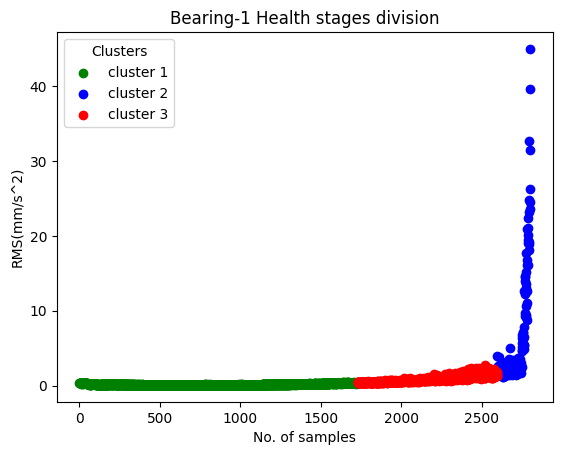

In [ ]:
from matplotlib.colors import ListedColormap

for i,j in enumerate(np.unique(y_hmm)):
  plt.scatter([list(x1).index(val) for val in x1[y_hmm==j,0]], x1[y_hmm==j,0], c=ListedColormap(('green','blue','red'))(i),label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-1 Health stages division")
plt.show()

In [ ]:
# [0,1,2] are the states --> Making 2 as 1 and 1 as 2 ==> According to our model, cluster 2 is the failure
# cluster 3 is the degradation state
for i in range(len(y_hmm)):
    if(y_hmm[i]==2):
        y_hmm[i]=1
    elif(y_hmm[i]==1):
        y_hmm[i]=2

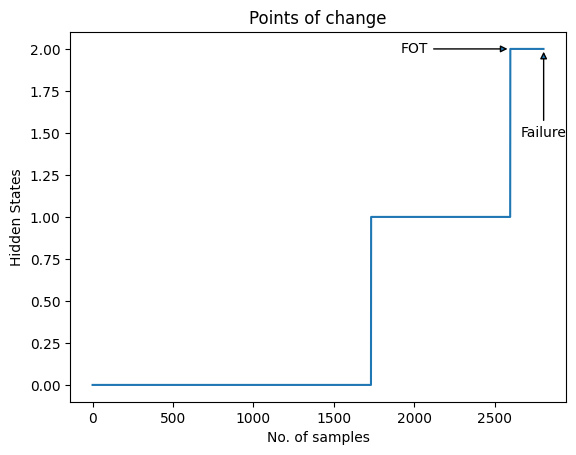

In [ ]:
# get current axis
plt.plot(range(len(y_hmm)), y_hmm)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(2596,2.0), xytext=(2000,2.0), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(2803,2.0), xytext=(2803,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

In [ ]:
y_hmm=hmm_model1.predict(b12_rms.reshape(-1,1))
y_hmm

Degenerate mixture covariance


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# 2596 , 851, ?, 1091
count=0
freq=0
for i in range(len(y_hmm)):
    if(y_hmm[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_hmm[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


851


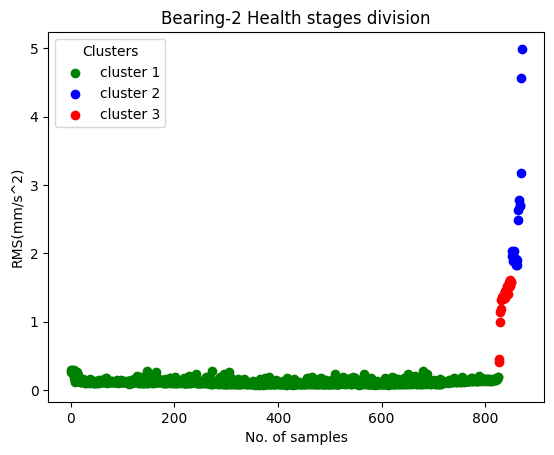

In [ ]:
from matplotlib.colors import ListedColormap
for i,j in enumerate(np.unique(y_hmm)):
  plt.scatter([list(x2).index(val) for val in x2[y_hmm==j,0]], x2[y_hmm==j,0], c=ListedColormap(('green','blue','red'))(i), label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-2 Health stages division")
plt.show()

In [ ]:
for i in range(len(y_hmm)):
    if(y_hmm[i]==2):
        y_hmm[i]=1
    elif(y_hmm[i]==1):
        y_hmm[i]=2


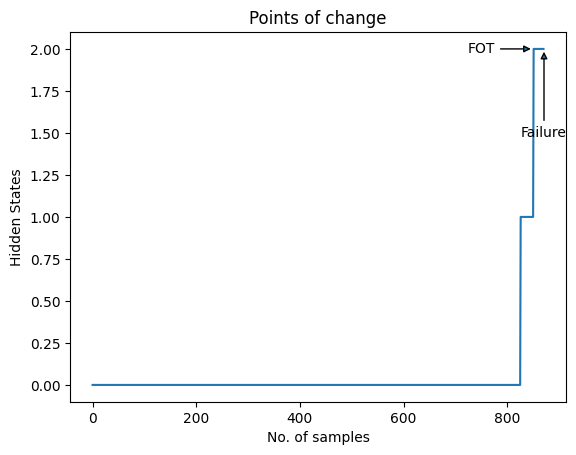

In [ ]:
# get current axis
plt.plot(range(len(y_hmm)), y_hmm)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(851,2.0), xytext=(750,2.0), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(871,2.0), xytext=(871,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

In [ ]:
y_hmm=hmm_model1.predict(b13_rms.reshape(-1,1))

Degenerate mixture covariance


In [ ]:
count=0
freq=0
for i in range(len(y_hmm)):
    if(y_hmm[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_hmm[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


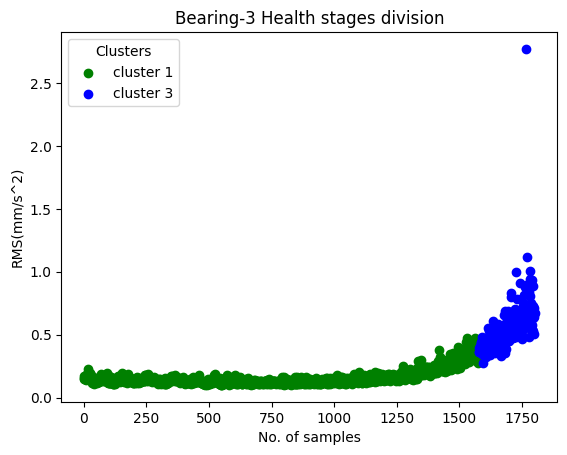

In [ ]:
from matplotlib.colors import ListedColormap
for i,j in enumerate(np.unique(y_hmm)):
  plt.scatter([list(x3).index(val) for val in x3[y_hmm==j,0]], x3[y_hmm==j,0], c=ListedColormap(('green','blue','red'))(i), label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-3 Health stages division")
plt.show()

In [ ]:
for i in range(len(y_hmm)):
    if(y_hmm[i]==2):
        y_hmm[i]=1
    elif(y_hmm[i]==1):
        y_hmm[i]=2


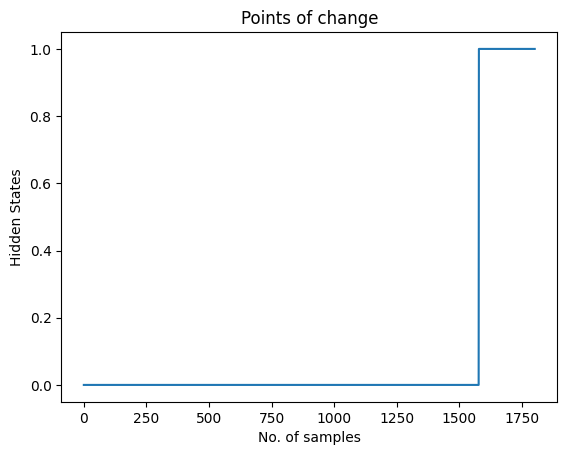

In [ ]:
# get current axis
plt.plot(range(len(y_hmm)), y_hmm)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(2596,2.0), xytext=(2000,2.0), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(2803,2.0), xytext=(2803,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

In [ ]:
y_hmm=hmm_model1.predict(b14_rms.reshape(-1,1))

Degenerate mixture covariance


In [ ]:
count=0
freq=0
for i in range(len(y_hmm)):
    if(y_hmm[i]!=1):
        count+=1
        freq=0
    if(i>0 and y_hmm[i]==1):
        freq+=1
        if(freq>=3):
            print(count)
            break


1091


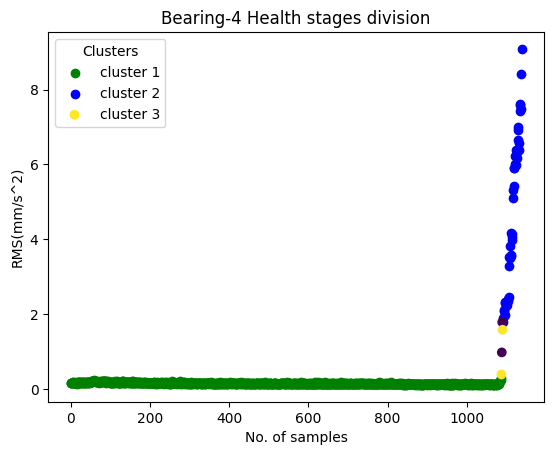

In [ ]:
from matplotlib.colors import ListedColormap
for i,j in enumerate(np.unique(y_hmm)):
  plt.scatter([list(x4).index(val) for val in x4[y_hmm==j,0]], x4[y_hmm==j,0], c=ListedColormap(('green','blue','red'))(i),label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-4 Health stages division")
plt.show()

In [ ]:
len(y_hmm)

1139

In [ ]:
for i in range(len(y_hmm)):
    if(y_hmm[i]==2):
        y_hmm[i]=1
    elif(y_hmm[i]==1):
        y_hmm[i]=2


In [ ]:
len(y_hmm)

1139

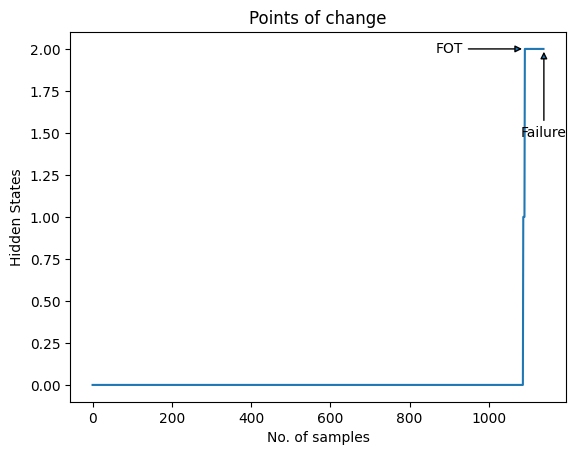

In [ ]:
# get current axis
plt.plot(range(len(y_hmm)), y_hmm)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(1091,2.0), xytext=(900,2.0), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(1139,2.0), xytext=(1139,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

In [ ]:
# Working with bearing-3 as its performance is not better with the random state 26
fot_vals=[]
for i in range(43):
    hmm_model=hmm.GMMHMM(n_components=3,n_mix=4,n_iter=50, random_state=i, tol=0.0001)
    hmm_model.fit(b11_rms.reshape(-1,1))
    hmm_model.fit(b12_rms.reshape(-1,1))
    try:
        y_hmm=hmm_model.predict(b13_rms.reshape(-1,1))
        count=0
        freq=0
        for j in range(len(y_hmm)):
            if(y_hmm[j]!=1):
                count+=1
                freq=0
            if(j>0 and y_hmm[j]==1):
                freq+=1
                if(freq>=3):
                    freq=0
                    fot_vals.append((i,count))
    except Exception as e:
        print(f"exempted {i}")

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

exempted 1


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

exempted 28


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization be

In [ ]:
max_val=0
for i, j in fot_vals:
    if(j>max_val):
        max_val=j
        print(i, max_val)


0 1643
42 1680


In [ ]:
hmm_model=hmm.GMMHMM(n_components=3,n_mix=4,n_iter=50, random_state=42, tol=0.0001)
hmm_model.fit(b11_rms.reshape(-1,1))
hmm_model.fit(b12_rms.reshape(-1,1))
y_hmm=hmm_model.predict(b13_rms.reshape(-1,1))

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'weights_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'w'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'
Degenerate mixture covariance


In [ ]:
x3=b13_rms.reshape(-1,1)

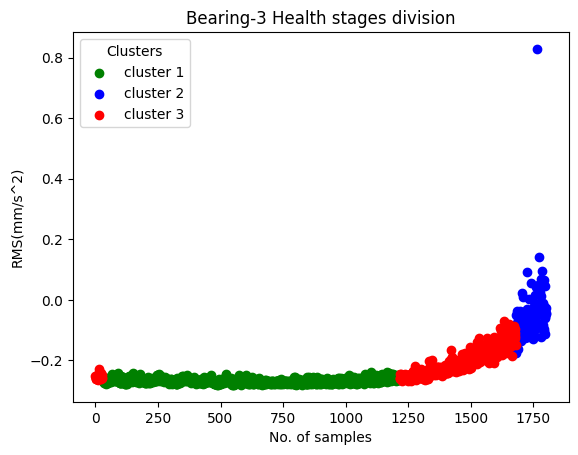

In [ ]:
from matplotlib.colors import ListedColormap
for i,j in enumerate(np.unique(y_hmm)):
  plt.scatter([list(x3).index(val) for val in x3[y_hmm==j,0]], x3[y_hmm==j,0], c=ListedColormap(('green','blue','red'))(i), label='cluster {}'.format(j+1))
# calculate cluster centers
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s=300, label='center/centroid', c='yellow')
plt.legend(title='Clusters')
plt.xlabel('No. of samples')
plt.ylabel('RMS(mm/s^2)')
plt.title("Bearing-3 Health stages division")
plt.show()

In [ ]:
for i in range(len(y_hmm)):
    if(y_hmm[i]==2):
        y_hmm[i]=1
    elif(y_hmm[i]==1):
        y_hmm[i]=2


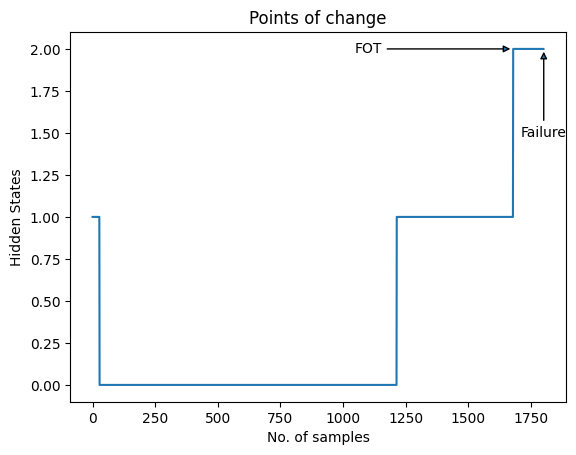

In [ ]:
# get current axis
plt.plot(range(len(y_hmm)), y_hmm)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(1680,2.0), xytext=(1100,2.0), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(1802,2.0), xytext=(1802,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

# Determinging the Fault occurence

In [ ]:
hidden_states11=hmm_model1.predict(b11_rms.reshape(-1,1))

Degenerate mixture covariance


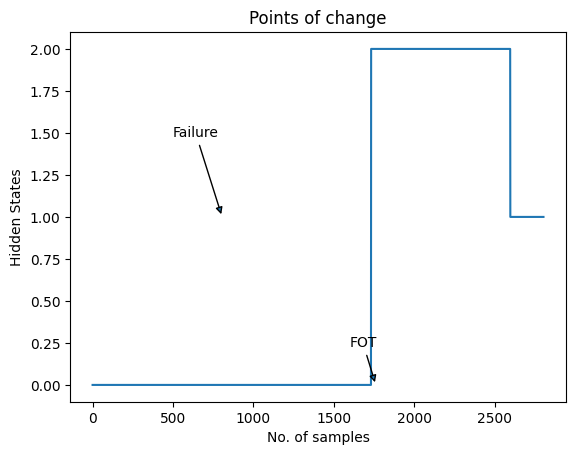

In [ ]:
# get current axis
plt.plot(range(len(hidden_states11)), hidden_states11)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("Hidden States", fontsize=10)
plt.title("Points of change")

ax=plt.gcf().gca()
ax.annotate("FOT", xy=(1760,0.0), xytext=(1680,0.25), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
ax.annotate("Failure", xy=(805,1), xytext=(640,1.5), arrowprops={'arrowstyle': '-|>','lw':1}, va='center',ha='center')
plt.show()

# Condition - 2

In [ ]:
b21_=process_file(dir_path1,'Bearing2_1')
b22_=process_file(dir_path1,'Bearing2_2')
b23_=process_file(dir_path2,'Bearing2_3')
b24_=process_file(dir_path2,'Bearing2_4')
b25_=process_file(dir_path2,'Bearing2_5')
b26_=process_file(dir_path2,'Bearing2_6')
b27_=process_file(dir_path2,'Bearing2_7')

Processing...: 100%|██████████| 200/200 [00:03<00:00, 53.44it/s]


In [ ]:
b21=[val for arr in b21_ for val in arr]
b22=[val for arr in b22_ for val in arr]
b23=[val for arr in b23_ for val in arr]
b24=[val for arr in b24_ for val in arr]
b25=[val for arr in b25_ for val in arr]
b26=[val for arr in b26_ for val in arr]
b27=[val for arr in b27_ for val in arr]

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

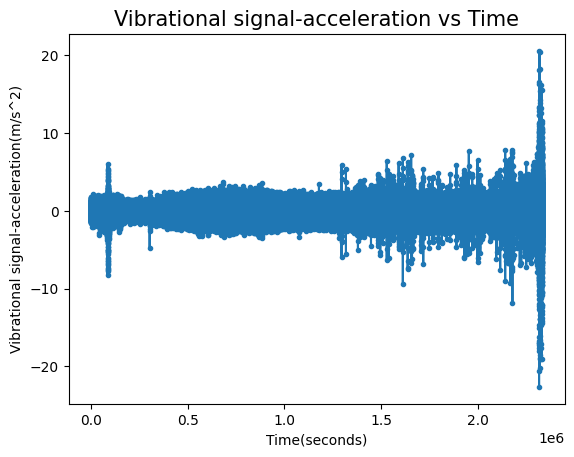

In [ ]:
plt.scatter(np.arange(0, len(b21)), b21, marker=".")
plt.plot(np.arange(0, len(b21)), b21)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

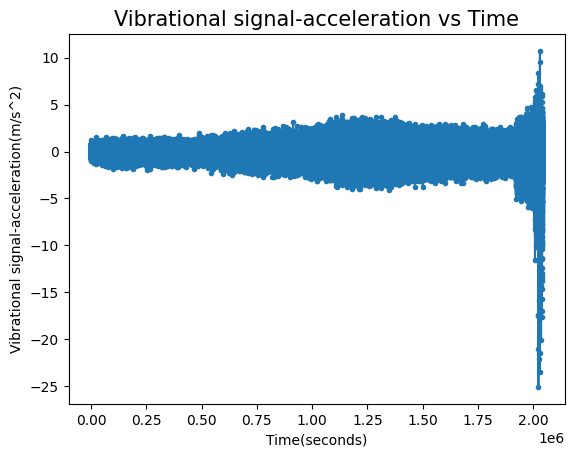

In [ ]:
plt.scatter(np.arange(0, len(b22)), b22, marker=".")
plt.plot(np.arange(0, len(b22)), b22)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

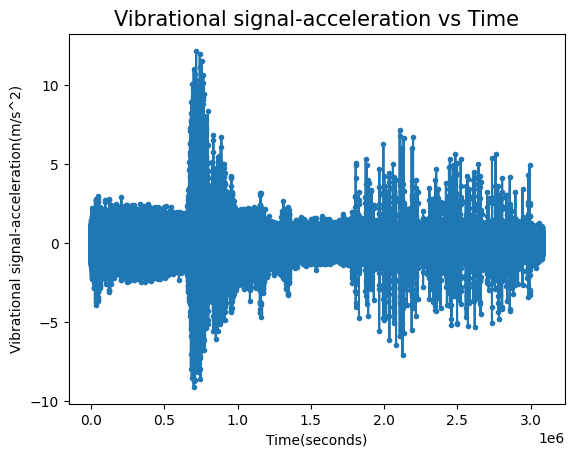

In [ ]:
plt.scatter(np.arange(0, len(b23)), b23, marker=".")
plt.plot(np.arange(0, len(b23)), b23)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

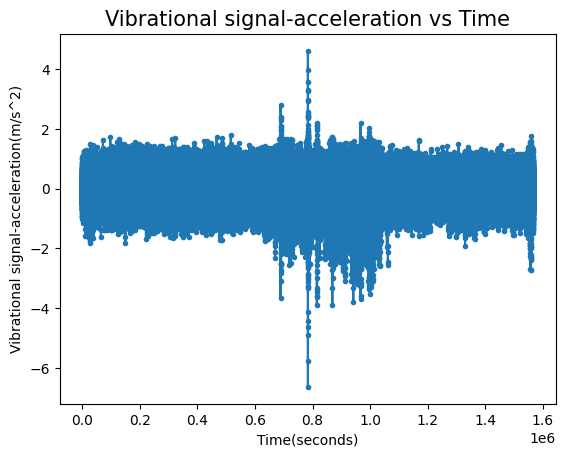

In [ ]:
plt.scatter(np.arange(0, len(b24)), b24, marker=".")
plt.plot(np.arange(0, len(b24)), b24)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

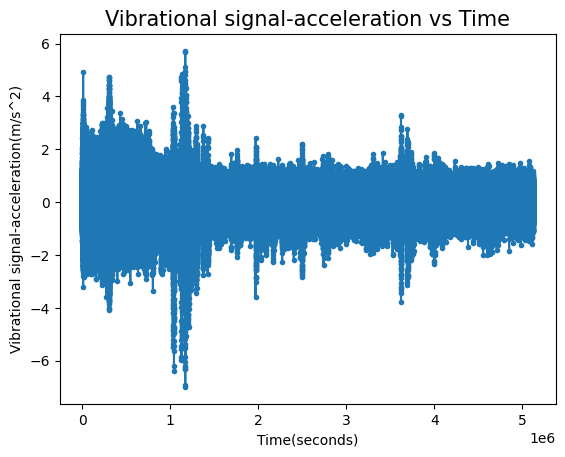

In [ ]:
plt.scatter(np.arange(0, len(b25)), b25, marker=".")
plt.plot(np.arange(0, len(b25)), b25)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

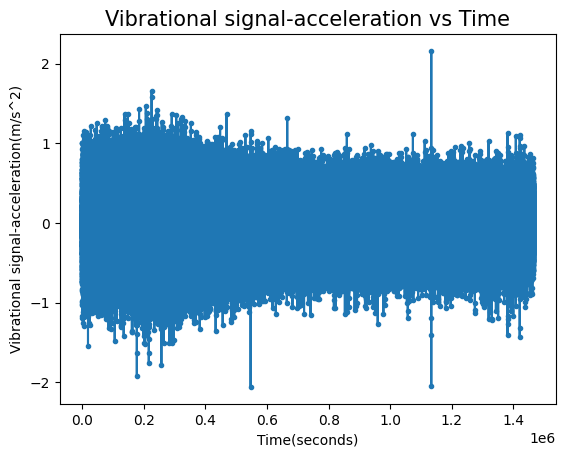

In [ ]:
plt.scatter(np.arange(0, len(b26)), b26, marker=".")
plt.plot(np.arange(0, len(b26)), b26)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

Text(0.5, 1.0, 'Vibrational signal-acceleration vs Time')

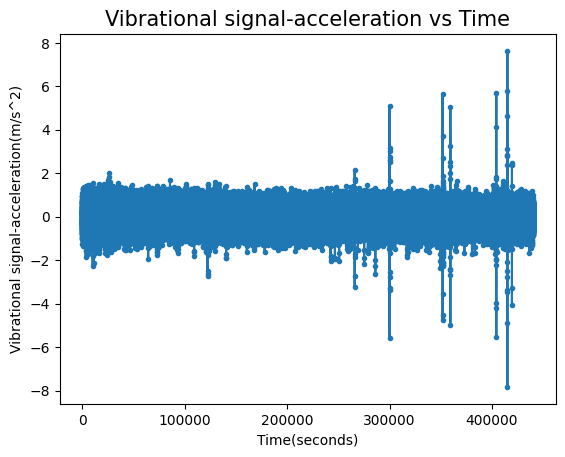

In [ ]:
plt.scatter(np.arange(0, len(b27)), b27, marker=".")
plt.plot(np.arange(0, len(b27)), b27)
plt.xlabel("Time(seconds)", fontsize=10)
plt.ylabel("Vibrational signal-acceleration(m/s^2)", fontsize=10)
plt.title("Vibrational signal-acceleration vs Time", fontsize=15)

In [ ]:
b21_rms=rms_extraction(dir_path1,'Bearing2_1')
b22_rms=rms_extraction(dir_path1,'Bearing2_2')
b23_rms=rms_extraction(dir_path2,'Bearing2_3')
b24_rms=rms_extraction(dir_path2,'Bearing2_4')
b25_rms=rms_extraction(dir_path2,'Bearing2_5')
b26_rms=rms_extraction(dir_path2,'Bearing2_6')
b27_rms=rms_extraction(dir_path2,'Bearing2_7')

Processing...: 100%|██████████| 200/200 [00:01<00:00, 125.58it/s]


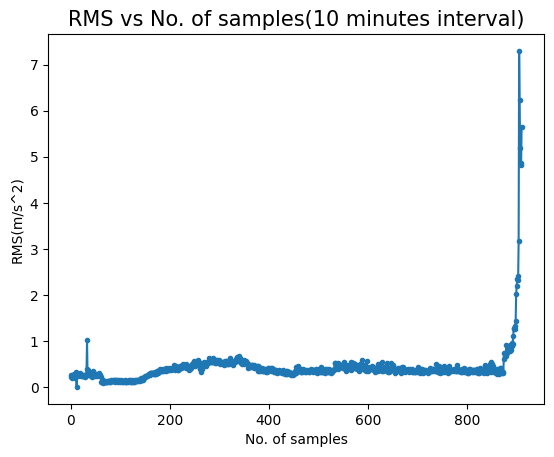

In [ ]:
plt.scatter(np.arange(0, len(b21_rms)), b21_rms, marker=".")
plt.plot(np.arange(0, len(b21_rms)), b21_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

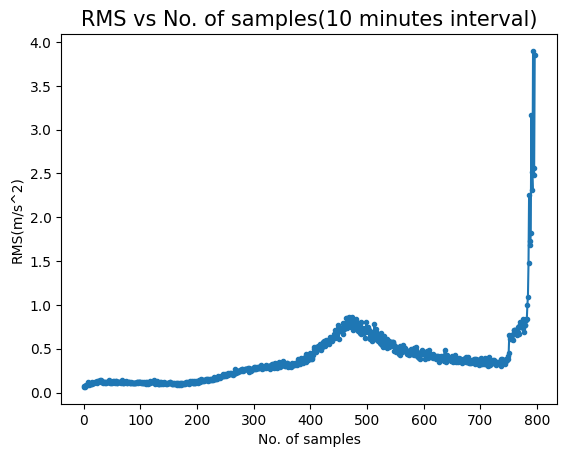

In [ ]:
plt.scatter(np.arange(0, len(b22_rms)), b22_rms, marker=".")
plt.plot(np.arange(0, len(b22_rms)), b22_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

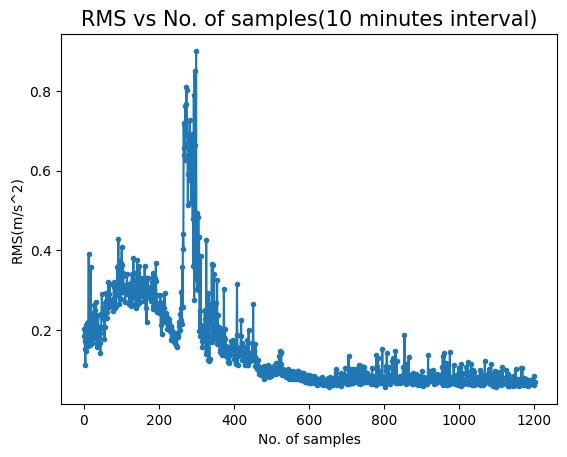

In [ ]:
plt.scatter(np.arange(0, len(b23_rms)), b23_rms, marker=".")
plt.plot(np.arange(0, len(b23_rms)), b23_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

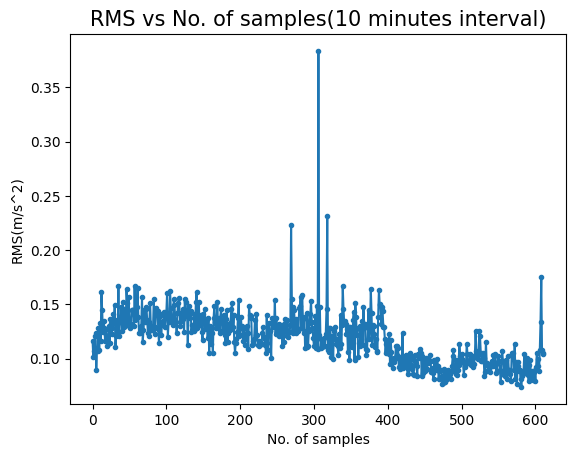

In [ ]:
plt.scatter(np.arange(0, len(b24_rms)), b24_rms, marker=".")
plt.plot(np.arange(0, len(b24_rms)), b24_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

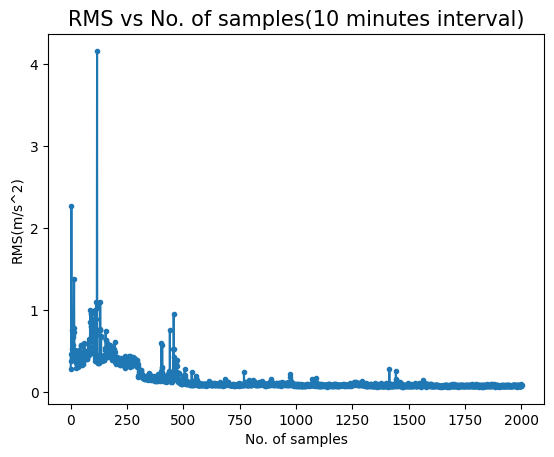

In [ ]:
plt.scatter(np.arange(0, len(b25_rms)), b25_rms, marker=".")
plt.plot(np.arange(0, len(b25_rms)), b25_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

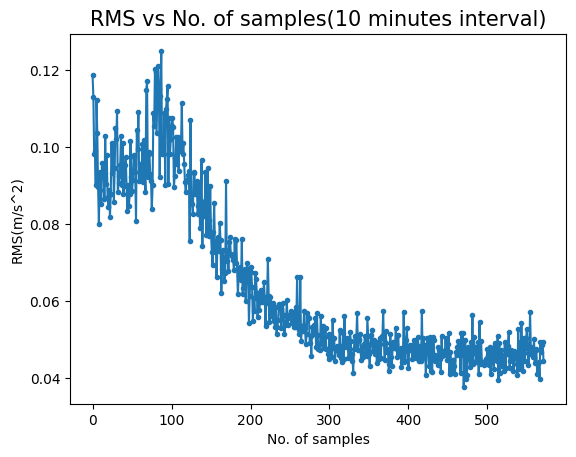

In [ ]:
plt.scatter(np.arange(0, len(b26_rms)), b26_rms, marker=".")
plt.plot(np.arange(0, len(b26_rms)), b26_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

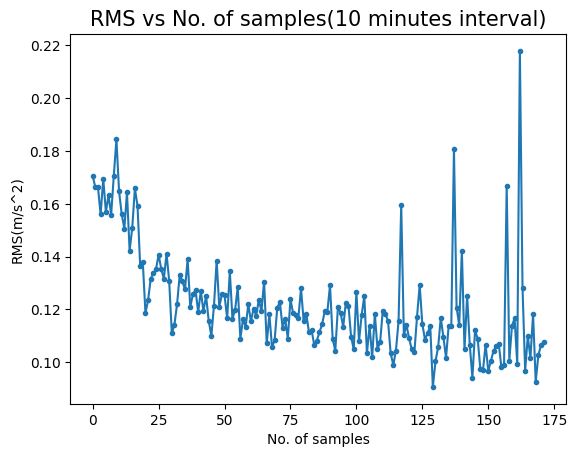

In [ ]:
plt.scatter(np.arange(0, len(b27_rms)), b27_rms, marker=".")
plt.plot(np.arange(0, len(b27_rms)), b27_rms)
plt.xlabel("No. of samples", fontsize=10)
plt.ylabel("RMS(m/s^2)", fontsize=10)
plt.title("RMS vs No. of samples(10 minutes interval)", fontsize=15)
plt.show()

hmm_model2

In [ ]:
b21_rms=np.array(b21_rms).reshape(-1,1)
b22_rms=np.array(b22_rms).reshape(-1,1)
b23_rms=np.array(b23_rms).reshape(-1,1)
b24_rms=np.array(b24_rms).reshape(-1,1)
b25_rms=np.array(b25_rms).reshape(-1,1)
b26_rms=np.array(b26_rms).reshape(-1,1)
b27_rms=np.array(b27_rms).reshape(-1,1)


# Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
b21_rms=sc.fit_transform(b21_rms.reshape(-1,1))
b22_rms=sc.transform(b22_rms.reshape(-1,1))
b23_rms=sc.transform(b23_rms.reshape(-1,1))
b24_rms=sc.transform(b24_rms.reshape(-1,1))

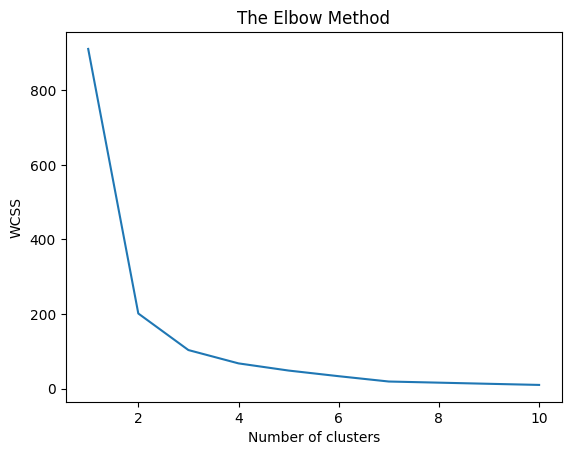

In [ ]:
from sklearn.cluster import KMeans
x1=b21_rms.reshape(-1,1)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title('The Elbow Method')
plt.show()